In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./insurance.csv')


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.shape

(1337, 7)

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# EDA

<AxesSubplot:xlabel='sex', ylabel='count'>

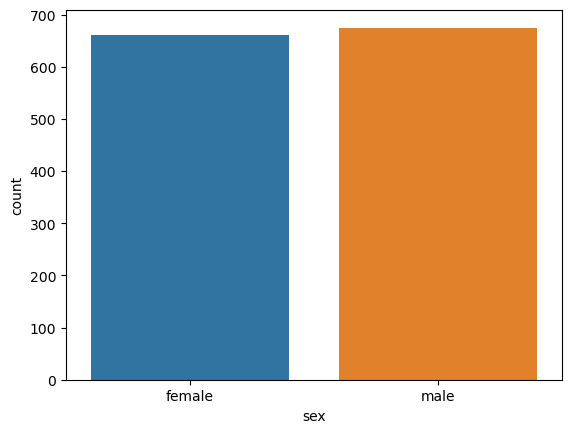

In [13]:
sns.countplot(x='sex',data=data)

<AxesSubplot:xlabel='children', ylabel='count'>

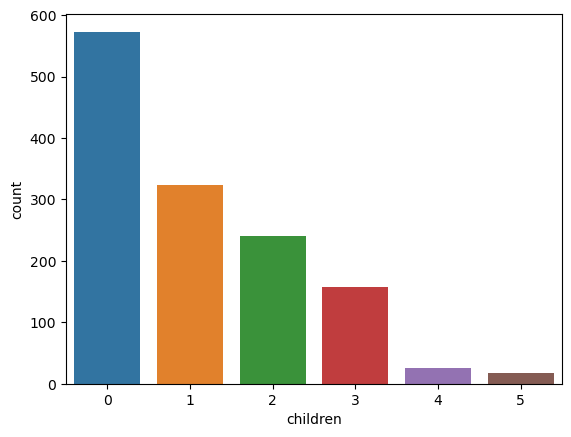

In [14]:
sns.countplot(x='children',data=data)

<AxesSubplot:xlabel='region', ylabel='count'>

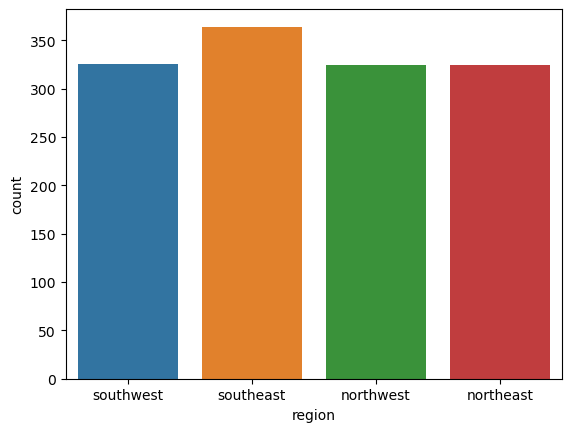

In [15]:
sns.countplot(x='region',data=data)

### Line plot

<AxesSubplot:xlabel='age', ylabel='charges'>

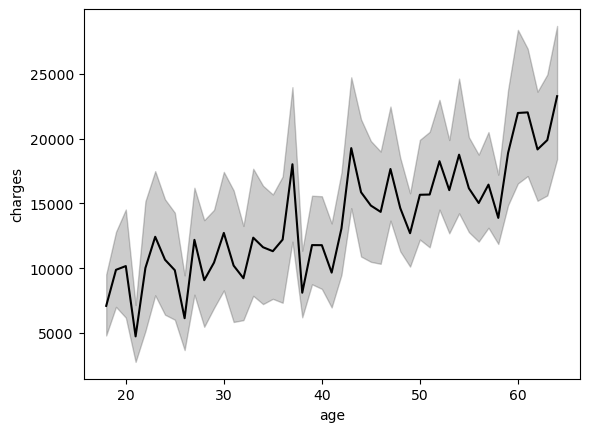

In [16]:
sns.lineplot(color='black',x='age',y='charges',data=data)

### barplot

<AxesSubplot:xlabel='region', ylabel='charges'>

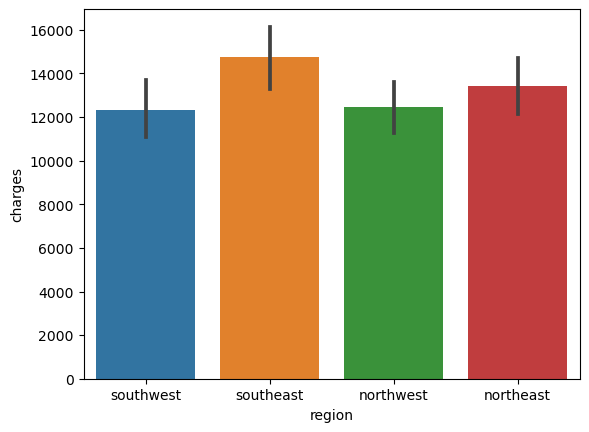

In [17]:
sns.barplot(x='region',y='charges', data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

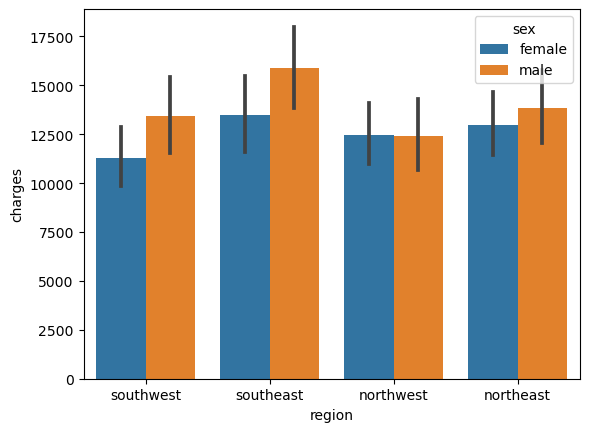

In [18]:
sns.barplot(x='region',y='charges',hue="sex", data=data)

<AxesSubplot:xlabel='region', ylabel='charges'>

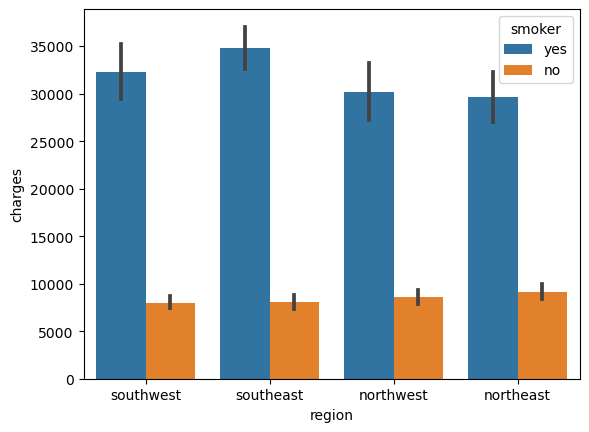

In [19]:
sns.barplot(x='region',y='charges',hue='smoker', data=data)

In [20]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Descriptive methods

## In which region there is maximum amount of smokers present 

In [21]:
d_smokers = data.query("smoker == 'yes'")

In [22]:
d_smokers.region.value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

#### Total of children

In [23]:
d_children = data.groupby(['children']).size()

In [24]:
d_children

children
0    573
1    324
2    240
3    157
4     25
5     18
dtype: int64

In [25]:
d_child =data.groupby(['children'])['region'].sum()

In [26]:
d_child

children
0    southwestnorthwestnorthwestsoutheastnorthwestn...
1    southeastsoutheastsouthwestnortheastsouthwestn...
2    northeastnorthwestnorthwestsouthwestsoutheasts...
3    southeastnorthwestsoutheastnorthwestnorthwestn...
4    southeastnorthwestnortheastnorthwestnorthwestn...
5    southwestnortheastsouthwestsouthwestsoutheasts...
Name: region, dtype: object

In [27]:
data.isin(['smoker ==''yes'])

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [28]:
data.isin(['male'])

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,True,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [29]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [30]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
18   female  20.790  0         no      southeast  1607.51010     1
48   female  27.360  1         no      northeast  9447.38240     1
             25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Length: 1337, dtype: int64

### Sorting 

In [31]:
data.sort_values('age')

,age,sex,bmi,children,smoker,region,charges
866,18,male,37.290,0,no,southeast,1141.44510
911,18,male,31.730,0,yes,northeast,33732.68670
1248,18,female,39.820,0,no,southeast,1633.96180
781,18,male,41.140,0,no,southeast,1146.79660
600,18,female,39.160,0,no,southeast,1633.04440
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
378,64,female,30.115,3,no,northwest,16455.70785
752,64,male,37.905,0,no,northwest,14210.53595
335,64,male,34.500,0,no,southwest,13822.80300


### total count of age

In [32]:
data['age'].value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

## BOXPLOT

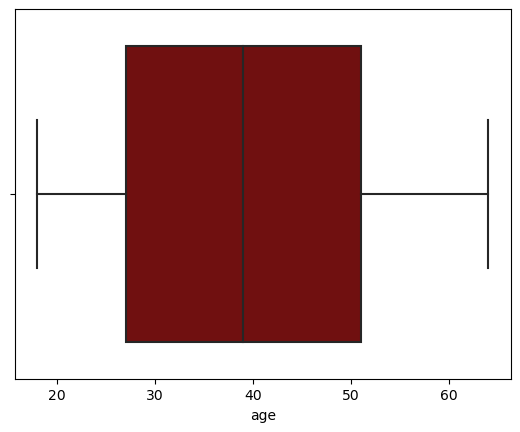

In [33]:
sns.boxplot(color = 'maroon',x='age',data = data)
plt.show()


### PIE CHART

#### charges for males and females in regions

In [34]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [35]:
s_charge = data.groupby(['sex','region'])['charges'].sum()

In [36]:
s_charge

sex     region   
female  northeast    2.085466e+06
        northwest    2.046699e+06
        southeast    2.362442e+06
        southwest    1.826455e+06
male    northeast    2.258203e+06
        northwest    1.987374e+06
        southeast    3.001248e+06
        southwest    2.186300e+06
Name: charges, dtype: float64

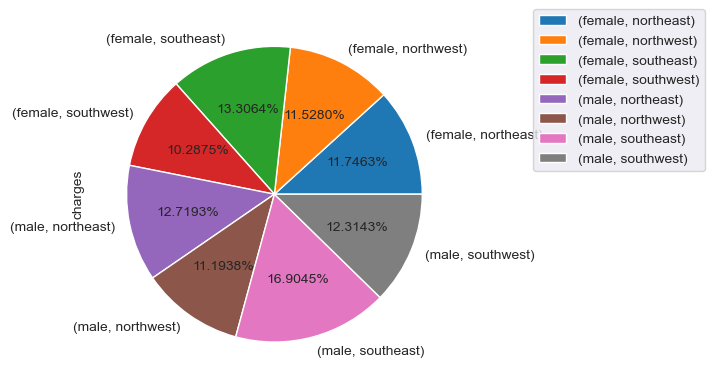

In [53]:
s_charge.plot.pie(autopct = '%1.4f%%')
plt.legend(bbox_to_anchor=(1.2,1), loc = 'upper left',borderaxespad =0)
plt.show()

### HISTPLOT

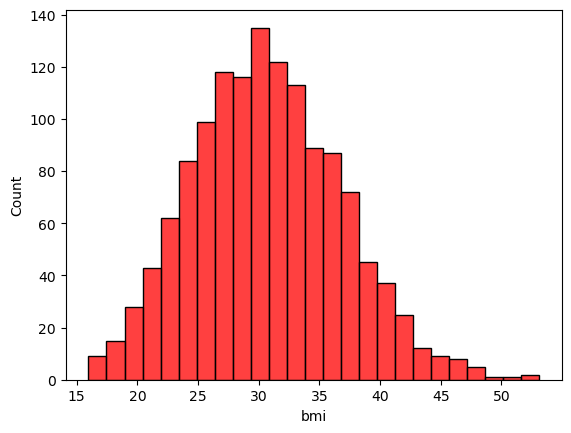

In [38]:
sns.histplot(data.bmi,color='red')
plt.show()

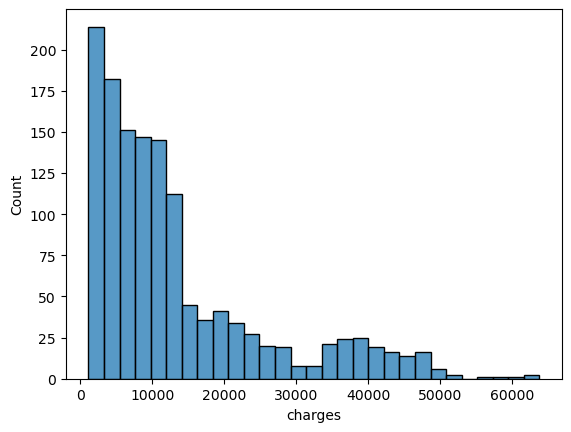

In [39]:
sns.histplot(data.charges)
plt.show()

### KDE PLOT

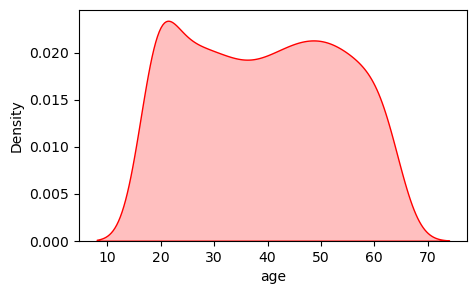

In [40]:
plt.figure(figsize =(5,3))
sns.kdeplot(data =data.age,shade="dark",color ="red")
plt.show()

### FACTOR PLOT

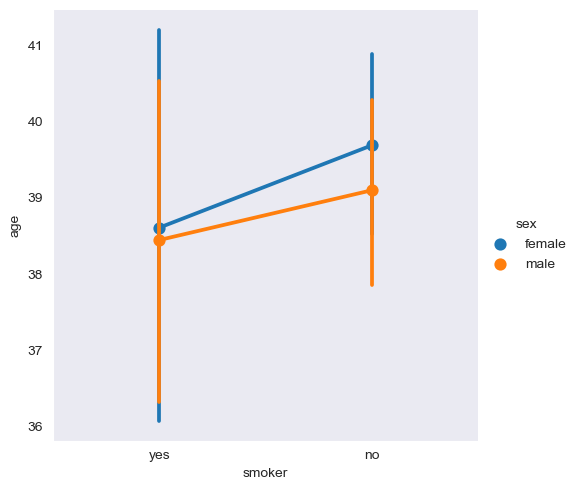

In [41]:
sns.set_style("dark")
sns.factorplot("smoker","age",hue="sex",data=data)
plt.show()

In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


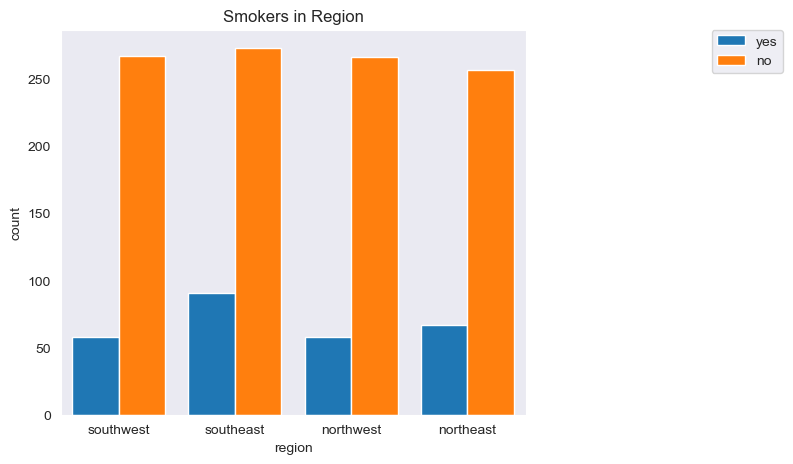

In [43]:
plt.figure(figsize =(6,5))
sns.set_style('dark')
sns.countplot(x='region',hue='smoker',data =data,saturation=2.0)
plt.title('Smokers in Region')
plt.legend(bbox_to_anchor=(1.4,1), loc = 'upper left',borderaxespad =0)
plt.show()

### PAIR PLOT

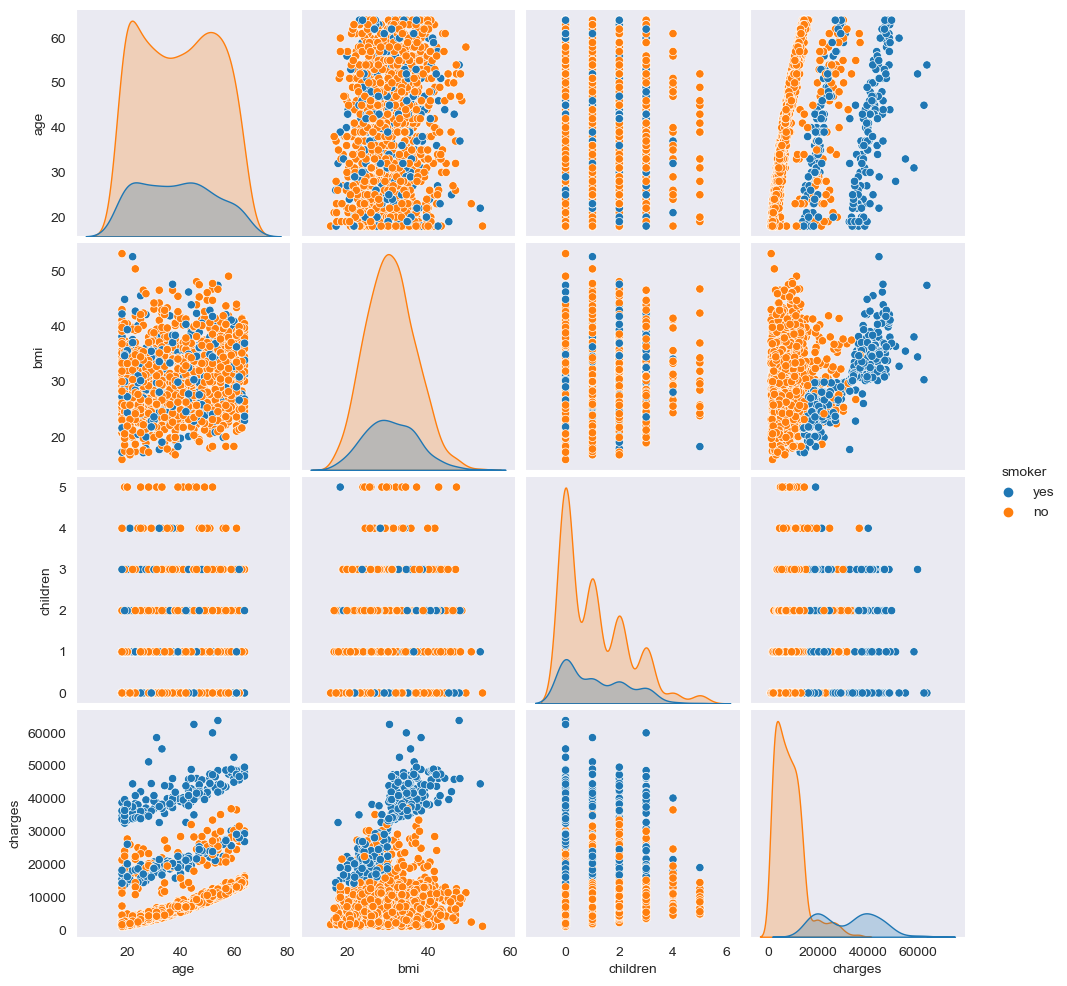

In [44]:
sns.pairplot(data=data,hue='smoker')
sns.color_palette("crest", as_cmap=True)
plt.show()

### HEAT MAP

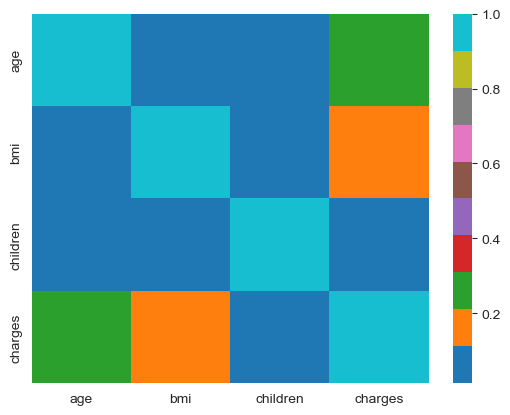

In [47]:

heat_map = data.corr()
sns.heatmap(heat_map,cmap = "tab10")
plt.show()

### VIOLIN PLOT

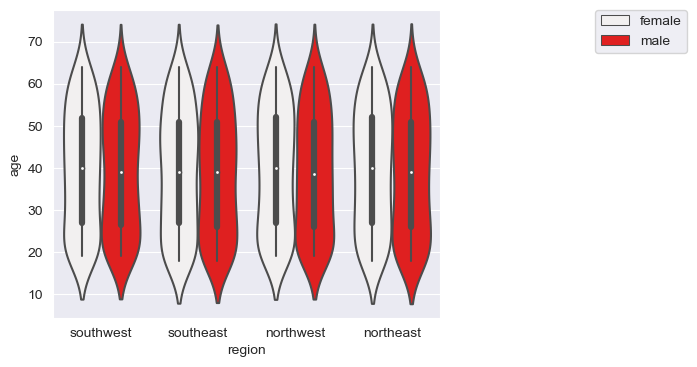

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.violinplot("region","age", hue="sex", data=data,color='red')
plt.legend(bbox_to_anchor=(1.4,1), loc = 'upper left',borderaxespad =0)
plt.show()

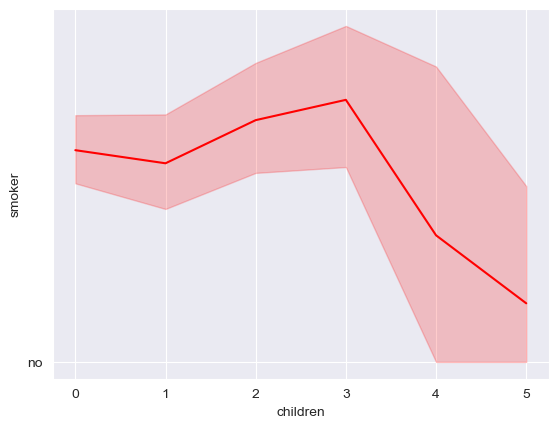

In [65]:
sns.lineplot(color='red',x='children',y='smoker',data=data)

plt.show()